In [1]:
from sqlalchemy import func,asc
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import emoji
warnings.filterwarnings('ignore')

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
Base = automap_base()
Base.prepare(engine,reflect=True)
Measurments = Base.classes.measurments
Stations = Base.classes.stations

In [4]:
session = Session(engine)

In [5]:
#numbers of vacation days
total_vacation_days = session.query(Measurments.date).\
filter(Measurments.date > '2016-10-01').\
filter(Measurments.date < '2016-10-10').order_by(Measurments.date.asc()).distinct().count()

#print statement
print('I have decided to go on a {} day vacation !!!'.format(total_vacation_days))

I have decided to go on a 8 day vacation !!!


In [47]:
query_temp_weather_for_vacation =session.query(Measurments.date, Measurments.tobs,Measurments.prcp).\
filter(Measurments.date > '2016-10-01').\
filter(Measurments.date < '2016-10-10').order_by(Measurments.date.asc()).all()

In [48]:
temp_vacaction_list = []
date_vacation_list = []
prcp_vacation_list = []

for date_vac,temp_vac,prcp_vac in query_temp_weather_for_vacation:
    date_vacation_list.append(date_vac)
    temp_vacaction_list.append(temp_vac)
    prcp_vacation_list.append(prcp_vac)
    
df_temp_weather_for_vacation= pd.DataFrame({"Date_Vacation":date_vacation_list,
              "Vacation_TOBS": temp_vacaction_list,
              "Vacation_PRCP": prcp_vacation_list})

df_temp_weather_for_vacation['Date_Vacation'] = pd.to_datetime(df_temp_weather_for_vacation['Date_Vacation'])

df_temp_weather_for_vacation.set_index(keys='Date_Vacation',inplace=True)

In [88]:
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


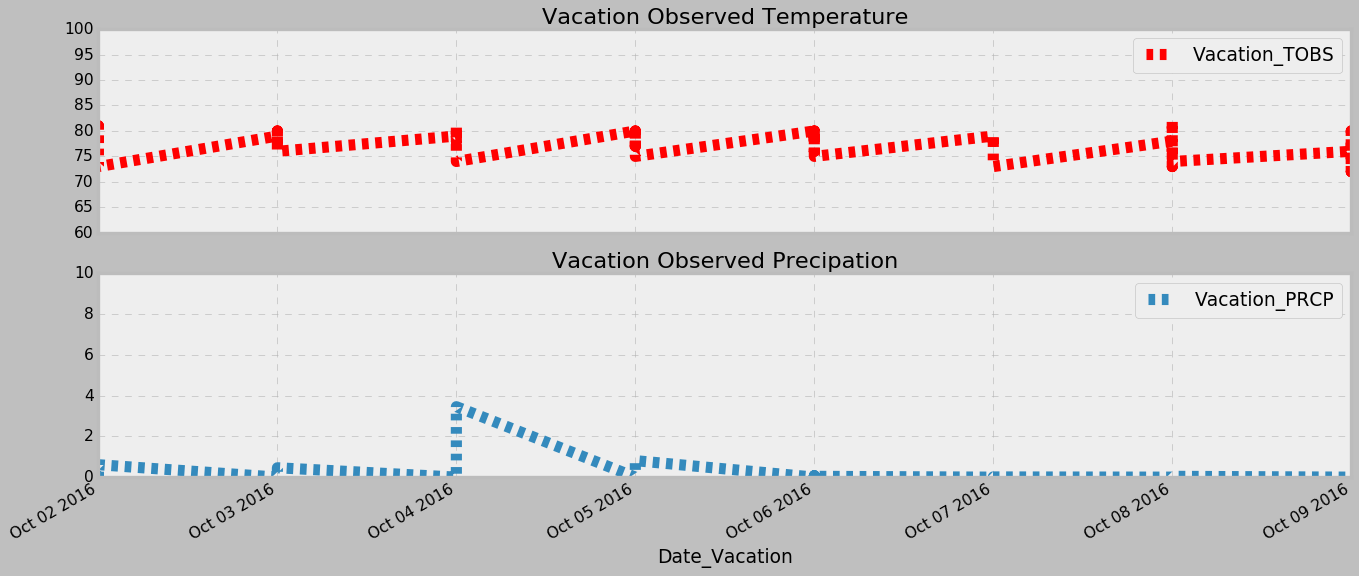

In [127]:
plt.style.use('bmh')

fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
df_temp_weather_for_vacation.Vacation_TOBS.plot(ax=ax1,figsize=(18,8),ls='--',lw=10,color='r',legend=True,title='Vacation Observed Temperature',ylim=(60,100))
df_temp_weather_for_vacation.Vacation_PRCP.plot(ax=ax2,figsize=(18,8),ls='--',lw=10,legend=True,title='Vacation Observed Precipation',ylim=(0,10));


In [129]:
Base.classes.keys()

['measurments', 'stations']

In [7]:
table_measurments = Base.classes.measurments
table_station = Base.classes.stations

## Precipitation Analysis

##  Design a query to retrieve the last 12 months of precipitation data.

In [11]:
precip_measurments_2015 =session.query(Measurments.date,Measurments.prcp).\
filter(Measurments.date.between('2015-01-01','2015-12-31')).all()

In [12]:
dates_list = []
precip_list = []

for dates,precip in precip_measurments_2015:
    dates_list.append(dates)
    precip_list.append(precip)
    

In [14]:
df_precip_measurments_2015= pd.DataFrame({'dates':dates_list,'precipitation':precip_list})

df_precip_measurments_2015['dates'] = pd.to_datetime(df_precip_measurments_2015['dates'])

df_precip_measurments_2015.set_index(['dates'],inplace=True)

In [15]:
df_greater_1_inch =df_precip_measurments_2015[df_precip_measurments_2015['precipitation'] >= 1]
df_less_1_inch =df_precip_measurments_2015[df_precip_measurments_2015['precipitation'] <= 1]
# df_at_1_inch =df_precip_measurments_2015[df_precip_measurments_2015['precipitation'] == 1]

In [52]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

## Plot Hawaii Rainfall for 2015

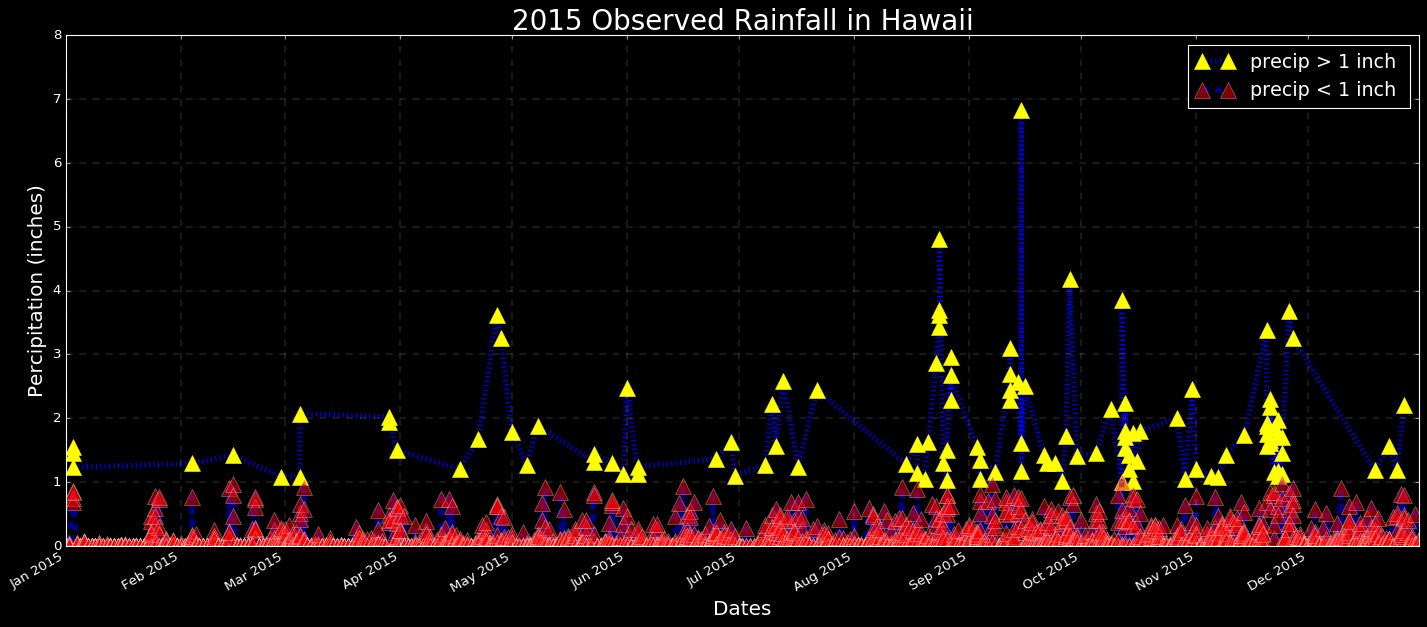

In [66]:
plt.style.use('dark_background')

df_greater_1_inch.precipitation.plot(c='b',figsize=(18,8),ls=':',lw=(5),marker='^',grid=True,label='precip > 1 inch ',markerfacecolor='yellow',ms=15,markeredgecolor='yellow')
# df_at_1_inch.precipitation.plot(c='b',figsize=(18,8),ls=':',lw=(5),marker='^',label='precip = 1 inch',markerfacecolor='white',ms=15,markeredgecolor='yellow')
df_less_1_inch.precipitation.plot(c='b',figsize=(18,8),ls='--',lw=(5),marker='^',grid=True,label='precip < 1 inch ', markerfacecolor='red',ms=15,markeredgecolor='white',alpha=.5)
plt.xlabel('Dates',fontsize=(18))
plt.ylabel('Percipitation (inches)',fontsize=(18));
plt.title('2015 Observed Rainfall in Hawaii',fontsize=(25));
plt.legend(fontsize='x-large')
plt.ylim(0,8)
plt.grid(color='white', linestyle='--', linewidth=2,alpha=.1)
plt.tight_layout()



## Summary for Hawaii Rainfall for 2015

In [20]:
df_precip_measurments_2015.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation,2175.0,0.1992,0.484478,0.0,0.0,0.02,0.16,6.83


## Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

* List the stations and observation counts in descending order

* Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

* Filter by the station with the highest number of observations.

* Plot the results as a histogram with `bins=12`

## Design a query to calculate the total number of stations

In [21]:
print('There are {} weather stations in hawaii'.format(session.query(Stations.station).count()))

There are 9 weather stations in hawaii


## Design a query to find the most active stations

In [22]:
most_active_stations = session.query(Stations.station,func.count(Stations.station))\
.order_by(func.count(Stations.station))\
.join(Measurments)\
.group_by(Stations.station).all()

In [23]:
each_station_list = []
active_value_list = []

for each_station,active_value in most_active_stations:
    each_station_list.append(each_station)
    active_value_list.append(active_value)
    


df_station_activity = pd.DataFrame({'Activity Count': active_value_list,'Station_id': each_station_list})


df_station_activity = df_station_activity[[ 'Station_id','Activity Count']]

df_station_activity

,Station_id,Activity Count
0,USC00518838,342
1,USC00517948,683
2,USC00511918,1932
3,USC00514830,1937
4,USC00516128,2484
5,USC00519523,2572
6,USC00519397,2685
7,USC00513117,2696
8,USC00519281,2772


## USC00519281 is the most active station

## Plot Most Active Stations Dataframe

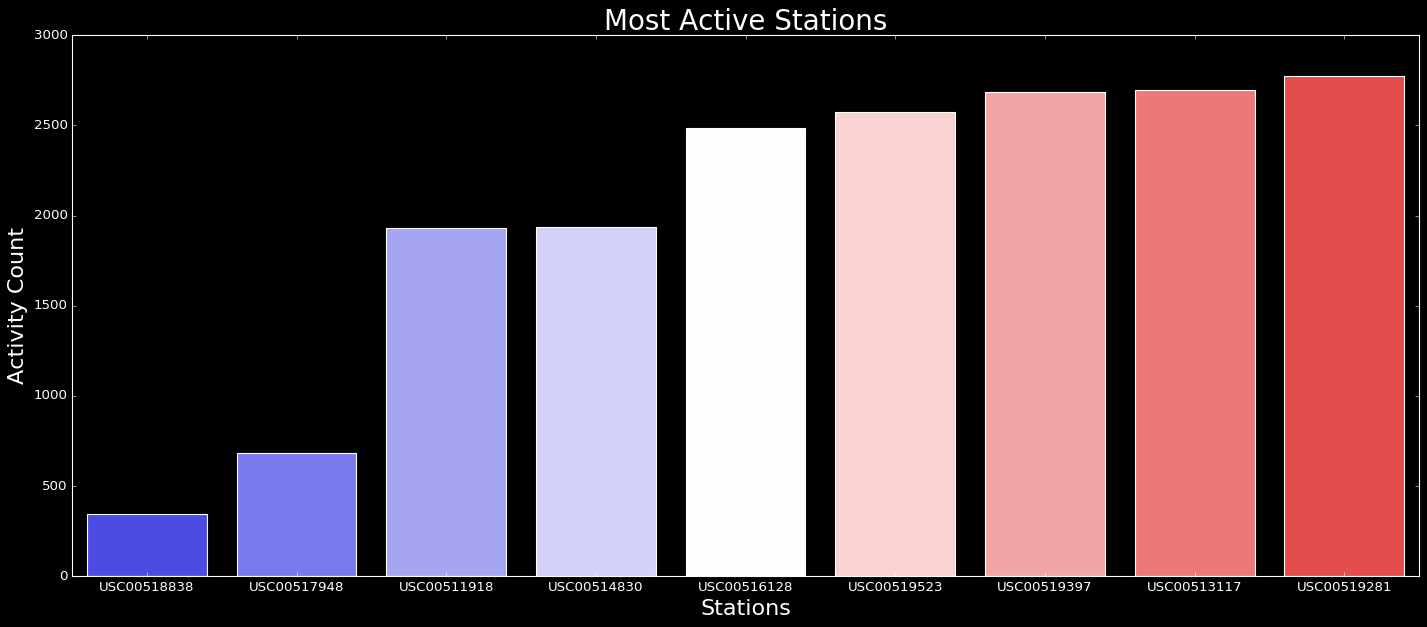

In [73]:
plt.style.use('dark_background')
plt.figure(figsize=(18,8))
sns.barplot(x='Station_id',y='Activity Count',data=df_station_activity,palette='bwr')
plt.xlabel('Stations',fontsize=(20))
plt.ylabel('Activity Count',fontsize=(20));
plt.title('Most Active Stations',fontsize=(25));
plt.legend(fontsize='x-large')
plt.tight_layout()

In [25]:
temp_measurments_2015 =session.query(Measurments.date,Measurments.tobs).\
filter(Measurments.date.between('2015-01-01','2015-12-31')).all()

In [26]:
each_date_list = []
temp_list = []

for each_date,temp in temp_measurments_2015:
    each_date_list.append(each_date)
    temp_list.append(temp)
    
    
df_temp_2015_hawaii = pd.DataFrame({'Date': each_date_list,
                                    'Temp': temp_list})
df_temp_2015_hawaii['Date'] = pd.to_datetime(df_temp_2015_hawaii['Date'])

df_temp_2015_hawaii.set_index(keys=['Date'],inplace=True)

In [28]:
df_temp_2015_hawaii_above_70 = df_temp_2015_hawaii[df_temp_2015_hawaii['Temp'] >= 70]
# df_temp_2015_hawaii_at_70 = df_temp_2015_hawaii[df_temp_2015_hawaii['Temp'] == 70]
df_temp_2015_hawaii_below_70 = df_temp_2015_hawaii[df_temp_2015_hawaii['Temp'] <= 70]

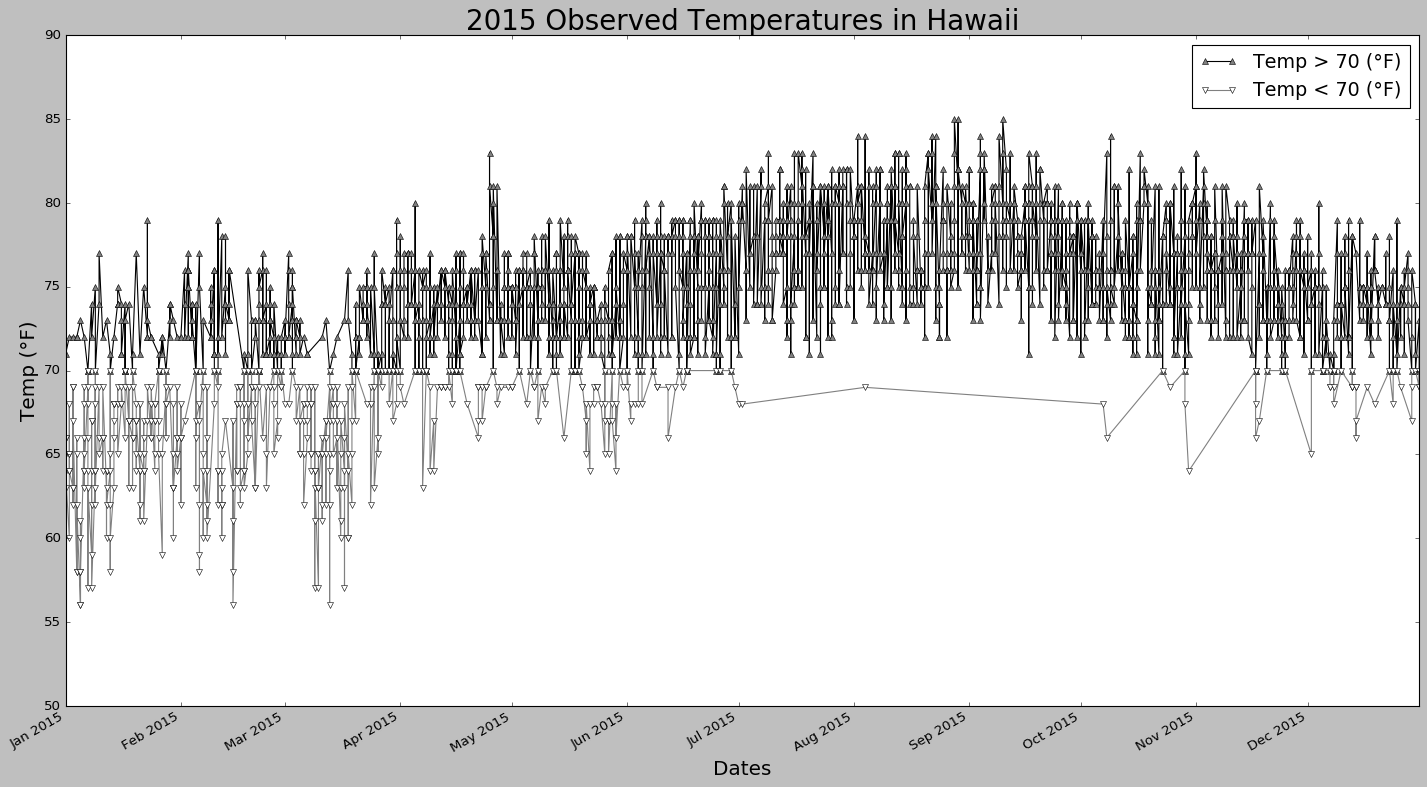

In [49]:
plt.style.use('classic')

plt.figure(figsize=(18,10))

df_temp_2015_hawaii_above_70.Temp.plot(c='black',marker='^',label= 'Temp > 70 (°F)',ms=5,markerfacecolor='gray')
# df_temp_2015_hawaii_at_70.Temp.plot(c='black',marker='>',label= 'Temp = 70 (°F)',ms=5,markerfacecolor='gray')
df_temp_2015_hawaii_below_70.Temp.plot(c='gray',marker='v',label='Temp < 70 (°F)', ms=5,markerfacecolor='white');
plt.xlabel('Dates',fontsize=(18))


plt.ylabel('Temp (°F)',fontsize=(18));
plt.title('2015 Observed Temperatures in Hawaii',fontsize=(25));
plt.legend(fontsize='x-large')
plt.ylim(50,90)
plt.tight_layout()





In [30]:
df_temp_2015_hawaii.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,2175.0,73.668966,5.071325,56.0,71.0,74.0,77.0,85.0


### In 2015, the average temperature in Hawaii was 73.6 °F with a standard deviation of +/- 5  °F. This sounds like perfect weather to me. 

In [31]:
print(emoji.emojize('Hawaii gets two :thumbsup: :thumbsup: and two raised :raised_hand: :raised_hand:.', use_aliases=True))

Hawaii gets two 👍 👍 and two raised ✋ ✋.


In [40]:
Station_highest_obersations = session.query(Measurments.date,Measurments.tobs,Measurments.station).\
filter(Measurments.date.between('2015-01-01','2015-12-31')).filter_by(station='USC00519281')\
.all()

In [41]:
all_date_list_obs = []
all_temp_list_obs = []
station_id_list_obs = []


for all_date_obs,all_temp_obs,station_id_obs in Station_highest_obersations:
    all_date_list_obs.append(all_date_obs)
    all_temp_list_obs.append(all_temp_obs)
    station_id_list_obs.append(station_id_obs)
    

In [42]:
df_Station_highest_obersations= pd.DataFrame({'Date': all_date_list_obs,
               'Temp': all_temp_list_obs,
            'station': station_id_list_obs})


df_Station_highest_obersations['Date'] = pd.to_datetime(df_Station_highest_obersations['Date'])

df_Station_highest_obersations.set_index('Date',inplace=True)

df_Station_highest_obersations = df_Station_highest_obersations[['Temp']]

df_Station_highest_obersations.head()

,Temp
Date,
2015-01-01,66
2015-01-02,60
2015-01-03,67
2015-01-04,65
2015-01-05,56


In [43]:
df_Station_highest_obersations_greater = df_Station_highest_obersations[df_Station_highest_obersations['Temp'] >= 70]
df_Station_highest_obersations_less = df_Station_highest_obersations[df_Station_highest_obersations['Temp'] <= 70]

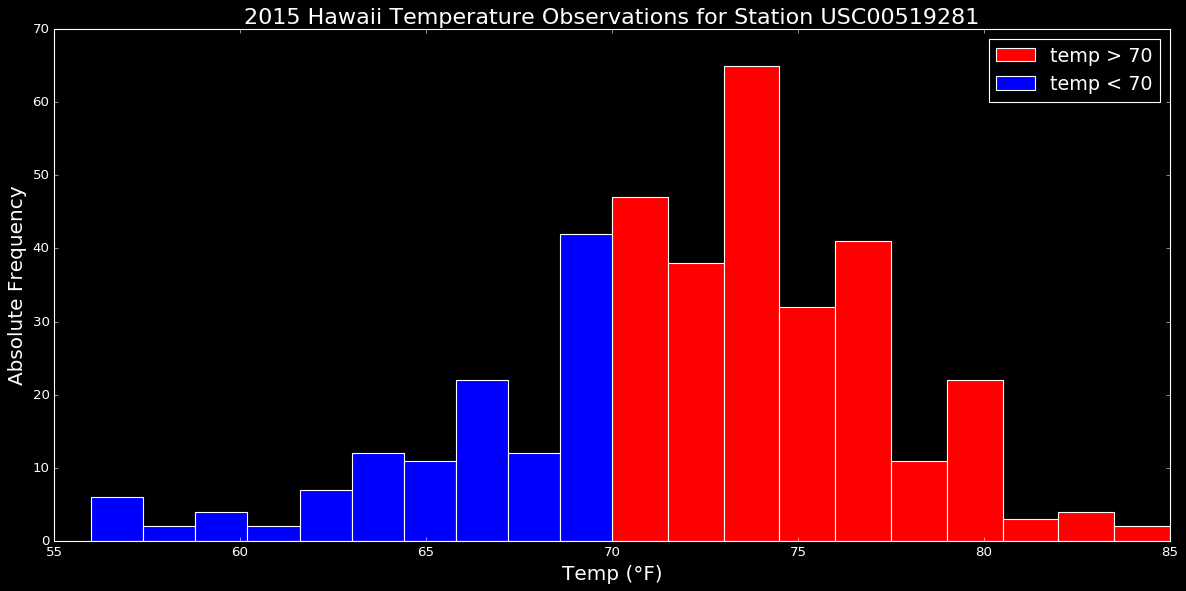

In [47]:
plt.style.use('dark_background')
plt.figure(figsize=(18,8))
df_Station_highest_obersations_greater.Temp.plot(kind='hist',color='r',label='temp > 70')
df_Station_highest_obersations_less.Temp.plot(kind='hist',color='b',label='temp < 70')
plt.legend(fontsize='x-large')
plt.xlabel('Temp (°F)',fontsize=(18))
plt.ylabel('Absolute Frequency',fontsize=(18))
plt.title('2015 Hawaii Temperature Observations for Station USC00519281',fontsize=(20));

## Temperature Analysis

In [75]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.avg(Measurments.tobs),func.min(Measurments.tobs),func.max(Measurments.tobs)).\
    filter(Measurments.date.between(start_date, end_date)).all()


In [76]:
df_avg_min_max_temps_012015_to_032016 = calc_temps('2015-01-28', '2016-01-05')

In [77]:
df_Temp_Analysis = pd.DataFrame({'Avg': [df_avg_min_max_temps_012015_to_032016[0][0]],
                               'Min': [df_avg_min_max_temps_012015_to_032016[0][1]],
                               'Max': [df_avg_min_max_temps_012015_to_032016[0][2]]})

tavg= df_avg_min_max_temps_012015_to_032016[0][0]
tmin = df_avg_min_max_temps_012015_to_032016[0][1]
tmax = df_avg_min_max_temps_012015_to_032016[0][2]

In [78]:
df_Temp_Analysis= df_Temp_Analysis.T.reset_index()

In [79]:
df_Temp_Analysis.rename_axis({'index':'Avg\Min\Max', 0 : 'Values'},axis=1,inplace=True)

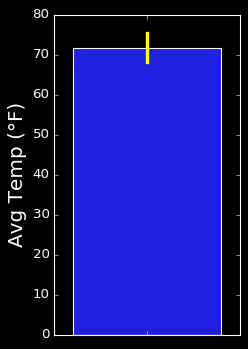

In [80]:
plt.style.use('dark_background')
plt.figure(figsize=(3,5))
sns.barplot(y='Values',data=df_Temp_Analysis,ci=tmax-tmin,errwidth=3,errcolor='yellow', color='blue')
plt.ylabel('Avg Temp (°F)',fontsize=(18));
